## 01a - Get the Size Over Time 
go through and get the number of outlinks between version

import:

    00_en_as_rev_everything.pkl
    00_ar_as_rev_everything.pkl
    
output:

    line graph of English and Arabic size over time
    sizeOverTime_AS_en.png
    sizeOverTime_AS_ar.png
    sizeOverTime_AS_BOTH.pdf
    
    
The Plan:
- get data
- get the size of the time and size of the revision
- clean data
- make plot


1. English
2. Arabic
3. Plot them both together

In [9]:
import numpy as np
import pandas as pd
import pickle

import wikifunctions as wf #Brian's stuff

%matplotlib inline
import matplotlib.pyplot as plt

import itertools

## 1. English

In [12]:
#move to Data folder
os.chdir("../Data")

In [15]:
#get data
with open("00_en_as_rev_everything.pkl", 'rb') as pickleFile:
    en_rev_df = pickle.load(pickleFile)

In [16]:
#get the size of the time and size of the revision
sizeVariation = en_rev_df.set_index('timestamp').to_dict()['size']

In [17]:
#clean data
sizeVariation_clean = {x:y for x,y in sizeVariation.items() if y>10000}

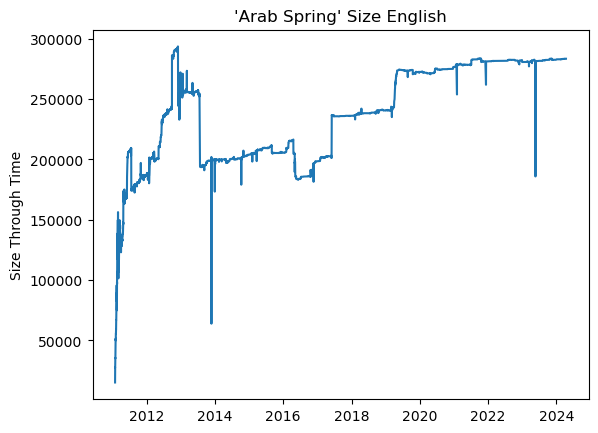

In [22]:
#make plot
lists = sorted(sizeVariation_clean.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.ylabel('Size Through Time') 
plt.title("'Arab Spring' Size English")

plt.plot(x, y)

#move the dir back
os.chdir("../01_Salience")
plt.savefig('01_Visuals/sizeOverTime_AS_en.png')


plt.show()

## 2. Arabic

In [31]:
#change folder
os.chdir("../Data")

with open("00_ar_as_rev_everything.pkl", 'rb') as pickleFile:
    ar_rev_df = pickle.load(pickleFile)

In [32]:
#get the size of the time and size of the revision
ar_sizeVariation = ar_rev_df.set_index('timestamp').to_dict()['size']

In [42]:
#clean it
ar_sizeVariation_clean = {x_2:y_2 for x_2,y_2 in ar_sizeVariation.items() if y_2>1000}

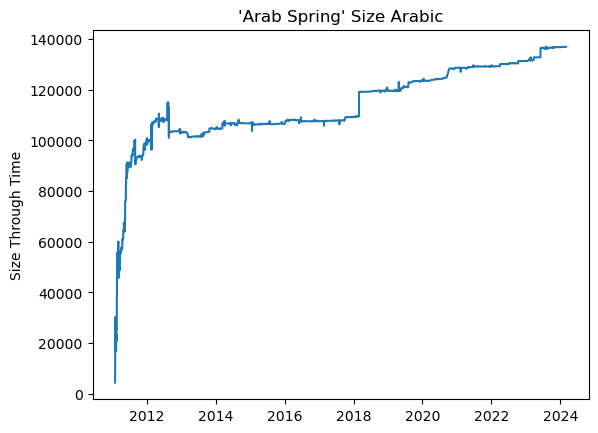

In [43]:
#plot it
lists = sorted(ar_sizeVariation_clean.items()) # sorted by key, return a list of tuples

x_2, y_2 = zip(*lists) # unpack a list of pairs into two tuples

plt.ylabel('Size Through Time') 
plt.title("'Arab Spring' Size Arabic")

plt.plot(x_2, y_2)
plt.savefig('01_Visuals/sizeOverTime_AS_ar.png')
plt.show()

## 3. Plot them both together

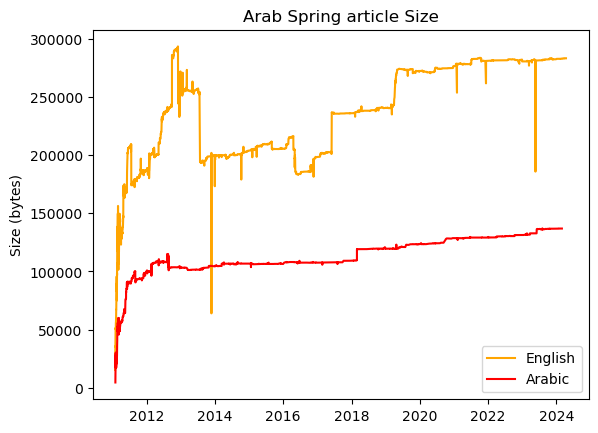

In [44]:
#english
lists = sorted(sizeVariation_clean.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

#arabic
lists = sorted(ar_sizeVariation_clean.items()) # sorted by key, return a list of tuples
x_2, y_2 = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y, color='orange', label='English') 
plt.plot(x_2, y_2, color='red', label='Arabic') 

plt.ylabel('Size (bytes)') 
plt.legend() 

plt.title('Arab Spring article Size')
plt.savefig('01_Visuals/sizeOverTime_AS_BOTH.pdf', bbox_inches='tight')
plt.show()